# I- Corrélation entre attributs et suppression manuelle de quelques features


## installation des lib

In [ ]:
%pip install plotly

In [ ]:
%pip install yellowbrick

In [ ]:
%pip install pandas

In [ ]:
%pip install matplotlib

In [ ]:
%pip install jinja2

In [ ]:
%pip install scikit-learn

In [ ]:
%pip install seaborn

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

## transformation des vars

In [ ]:
df = pd.read_csv('../df.csv')

enc = preprocessing.LabelEncoder()
#convertit en numérique les colonnes et évite de convertir les colonnes latitude et longitude pour garder les bonnes valeur pour les graphiques

for column_name in df:
    if column_name != 'longitude' and column_name != 'latitude':
        if not column_name.isnumeric()  :
            df[column_name] = enc.fit_transform(df[column_name])


df.info()
df
#matrice de correlation
corr_df = df.corr(method='pearson')

plt.figure(figsize=(15, 10))
sns.heatmap(round(corr_df,2), annot=True)
plt.xticks(rotation=90)
plt.show()

#supprimer colonne
del df['Num_Acc']
del df['num_veh']
del df['id_usa']
del df['ville']
del df['id_code_insee']
del df['descr_athmo']
del df['descr_lum']
del df['descr_etat_surf']
del df['description_intersection']
del df['an_nais']
del df['age']
del df['descr_motif_traj']
del df['descr_type_col']
del df['region']
del df['departement']

corr_df = df.corr(method='pearson')

plt.figure(figsize=(15, 10))
sns.heatmap(round(corr_df,2), annot=True)
plt.xticks(rotation=90)
plt.show()
#del df['nom colonne']


df.to_csv("../dfClean.csv",sep=",",index=False)

# Partionnement ( Clustering )

## k-means from scikit-learn

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger les données (latitude, longitude) dans un DataFrame
data = df[['latitude', 'longitude']]

# Liste des nombres de clusters à tester
n_clusters = [2, 3, 4, 5, 6]

# Effectuer le clustering pour chaque nombre de clusters
for n in n_clusters:
    # Instancier le modèle K-means
    kmeans = KMeans(n_clusters=n, random_state=42)
    print(kmeans)
    # Effectuer le clustering
    kmeans.fit(data)
    # Assigner les clusters aux points de données
    labels = kmeans.labels_
    #obtention coordonnées des centroïdes 
    centroids = kmeans.cluster_centers_
    
    # Afficher le résultat du clustering
    plt.scatter(data['longitude'], data['latitude'], c=labels)
    plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', color='red')
    plt.title(f"Clustering with {n} clusters")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFou

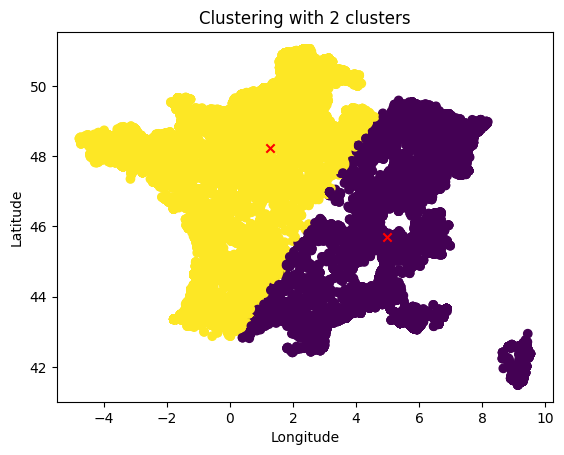

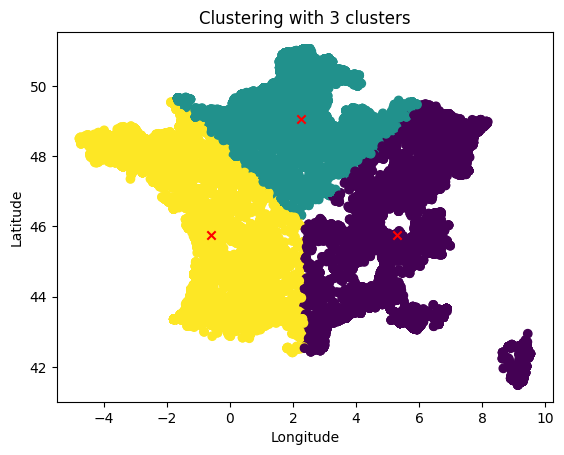

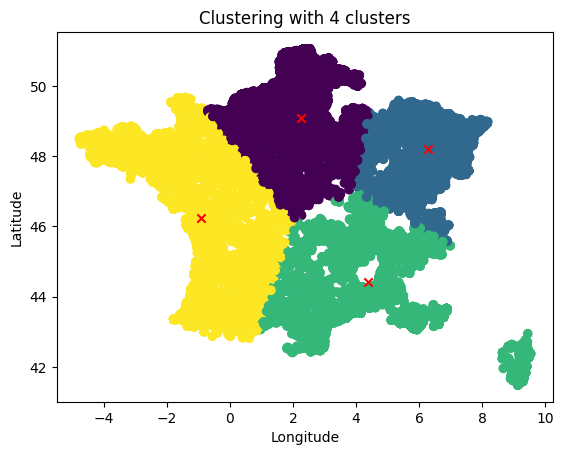

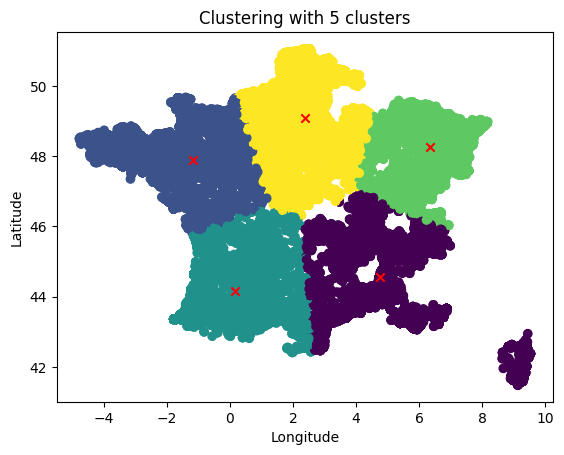

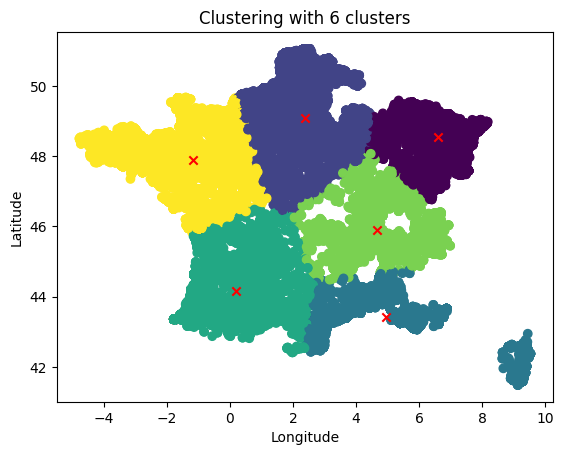

[array([1, 0, 0, ..., 0, 0, 0]), array([2, 0, 0, ..., 0, 0, 0]), array([3, 2, 2, ..., 2, 2, 2]), array([1, 0, 0, ..., 0, 0, 0]), array([5, 4, 4, ..., 2, 2, 2])] [[48.53393666  6.59537197]
 [49.08606626  2.37277821]
 [43.41009256  4.94987023]
 [44.1637833   0.18609149]
 [45.91074939  4.67812791]
 [47.88120928 -1.16586706]]


"for n in n_clusters:\n    sklearn_clustering[n] = metrics.silhouette_score(data, labels, metric='euclidean')\n#affiche juste le dernier silhouette score du dernier nombre de cluster (ici 6)\n    print(sklearn_clustering[n])\n"

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import yellowbrick
#évite d'avoir des couleurs ternes dû à yellowbrick
yellowbrick.style.rcmod.reset_defaults()


def sklearn_clustering(data, n_clusters):
    # Dictionnaire pour stocker les résultats des clusters
    results = {}
    all_labels = []
    
    # Effectuer le clustering pour chaque nombre de clusters
    for n in n_clusters:
        labels = []
        # Instancier le modèle K-means
        kmeans = KMeans(n_clusters=n, random_state=42)
        # Effectuer le clustering
        kmeans.fit(data)
        # Assigner les clusters aux points de données
        labels = kmeans.labels_
        #obtention coordonnées des centroïdes
        centroids = kmeans.cluster_centers_
        # Stocker les résultats des clusters
        results[n] = {'labels': labels, 'centroids': centroids}
        all_labels.append(labels)
    
    # Affichage des résultats des clusters pour chaque nombre de clusters
    for n, result in results.items():
        labels = result['labels']
        centroids = result['centroids']
        
        # Afficher le résultat du clustering
        plt.scatter(data['longitude'], data['latitude'], c=labels)
        plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', color='red')
        plt.title(f"Clustering with {n} clusters")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    return all_labels,centroids

data = df[['latitude', 'longitude']]
n_clusters = [2, 3, 4, 5, 6]

all_labels,centroids = sklearn_clustering(data, n_clusters)
print(all_labels,centroids)
'''for n in n_clusters:
    sklearn_clustering[n] = metrics.silhouette_score(data, labels, metric='euclidean')
#affiche juste le dernier silhouette score du dernier nombre de cluster (ici 6)
    print(sklearn_clustering[n])
'''


## k-means from scratch

In [12]:
import matplotlib.pyplot as plt

In [13]:
from math import floor
import numpy as np


def naiveShard(df, k):
    
    n = df.shape[1]
    m = df.shape[0]
    centroidf = np.mat(np.zeros((k, n)))

    # Sum all elements of each row, add as col to original dataset, sort
    composite = np.mat(df.sum(axis=1))
    df = np.append(composite.T, df, axis=1)
    df.sort(axis=0)

    # Step value for dataset sharding
    step = floor(m / k)

    # Vectorize mean ufunc for numpy array
    vfunc = np.vectorize(_get_mean)

    # Divide matrix rows equally by k-1 (so that there are k matrix shardf)
    # Sum columns of shardf, get means; these columnar means are centroidf
    for j in range(k):
        if j == k - 1:
            centroidf[j:] = vfunc(np.sum(df[j * step:, 1:], axis=0), step)
        else:
            centroidf[j:] = vfunc(np.sum(df[j * step:(j + 1) * step, 1:], axis=0), step)

    return centroidf

def _get_mean(sums, step):
    return sums / step


In [14]:
def getMean(coords):
    num_coords = len(coords)
    sum_x = sum(x[0] for x in coords)
    sum_y = sum(y[1] for y in coords)
    mean_x = sum_x / num_coords
    mean_y = sum_y / num_coords

    return mean_x, mean_y

In [15]:
import sklearn.preprocessing
def Kmeans(NbCentroids,daf):
    clusterList = [[] for _ in range(NbCentroids)]
    daf = daf[['latitude','longitude']]

    #on va utiliser la méthode par naive sharding
    minmax_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
    X_scaled = minmax_scaler.fit_transform(daf)
    centroids = naiveShard(X_scaled, k=NbCentroids)
    centroids = minmax_scaler.inverse_transform(np.array(centroids))
    difference = 10
    #pour chaque accident on regarde quel est le centroide le plus proche
    while difference > 0.4:
        for index, row in daf.iterrows():
            pt = [row['latitude'],row['longitude']]
            distlist = [[] for _ in range(NbCentroids)]
            for i in range(len(centroids)):
                distlist[i] = np.linalg.norm(np.array(pt) - centroids[i]) #dist eucl*
            min_index = distlist.index(min(distlist))
            clusterList[min_index].append(pt)
    #on regarde en faisant la moy. du cluster, si on obtient un centroid assez proche
        newCentroids = []
        for e in clusterList:
            newCentroids.append(getMean(e))
        difference = np.linalg.norm(np.array(newCentroids) - centroids)
        print(difference)
        if difference > 0.4:
            centroids = np.array(newCentroids)
            clusterList = [[] for _ in range(NbCentroids)]
    
    return clusterList,centroids

In [16]:
a = Kmeans(13,data)

5.920170867320352
2.618678907188294
0.9080841390561776
0.5834547989611518
0.4633179483984414
0.3724138518104459


In [17]:
listPts =  [3.2442204305137876,1.2797755912360278,0.49821046599937735,0.28168892525449224]

plt.xlabel("itérations")
plt.ylabel("score différence")
plt.plot(listPts)

IUTILSIER PLOTLY !!

a[0] <=> Pts par cluster

In [18]:

y_coords = [coord[0] for coord in a[1]]
x_coords = [coord[1] for coord in a[1]]
print(x_coords,y_coords)

[-2.209033521928849, -0.5795891130108655, -0.6229764237039149, 2.070638268649163, 5.262844563758385, 0.7942723267506439, 0.4745182154683433, 2.301841178083667, 2.852884772552029, 4.0645864877049185, 4.769258312337545, 6.149439536500589, 7.475884808646388] [48.12844464324618, 43.533104650374504, 45.45874918214598, 43.76326204637201, 43.44109731543656, 47.15323664471739, 49.29232446290503, 48.84585091808284, 50.49521395528135, 48.310621475410066, 45.88885825091141, 48.76227668018561, 48.33731669029003]


In [19]:
import plotly.graph_objects as go
import plotly.offline as offline


# Create a scatter plot on a map
fig = go.Figure()

# Iterate over each cluster
for cluster in a[0]:
    y_coords = [coord[0] for coord in cluster]
    x_coords = [coord[1] for coord in cluster]
    
    # Add scattermapbox trace for the current cluster
    fig.add_trace(go.Scattermapbox(
        lat=y_coords,
        lon=x_coords,
        mode='markers',
        marker=dict(size=8)
    ))

    


y_coords = [coord[0] for coord in a[1]]
x_coords = [coord[1] for coord in a[1]]
    
# Add scattermapbox trace for the current cluster
fig.add_trace(go.Scattermapbox(
    lat=y_coords,
    lon=x_coords,
    mode='markers',
    marker=dict(size=20, color='red'),
    below=''
))



# Add axis labels
fig.update_layout(
    mapbox_style='open-street-map',  # Specify the map style
    mapbox=dict(
        center=dict(lat=46.603354, lon=1.888334),  # Set the center of the map to France's approximate coordinates
        zoom=5  # Set the zoom level to show France in the initial view
    ),
    width=1280,   # Set the desired width (in pixels)
    height=960,
    margin=dict(l=0, r=0, t=0, b=0)  # Set margin to remove unnecessary padding
)


fig.show()



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

(apparté pour tester la méthode Naive SHarding)

le test avec nos données en pandas df

In [ ]:
import sklearn.preprocessing

# Scale dataset
minmax_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
X_scaled = minmax_scaler.fit_transform(data)
centroids = naiveShard(X_scaled, 3)
print(centroids)


[[0.30480851 0.33569176]
 [0.68225776 0.5124189 ]
 [0.82374934 0.71279196]]


# Evaluations quantitatives des résultats "non-supervisés"

## En utilisant : Silhouette Coefficient

### Evaluation de sklearn_clustering

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
data = df[['latitude', 'longitude']]
n_clusters = [2, 3, 4, 5, 6]
all_labels, centroids = sklearn_clustering(data, n_clusters)
results = {}
all_labels = []
for n in n_clusters:
        # Instancier le modèle K-means
    # Effectuer le clustering
        # Assigner les clusters aux points de données
    labels = kmeans.labels_
        #obtention coordonnées des centroïdes
    centroids = kmeans.cluster_centers_
        # Stocker les résultats des clusters
    results[n] = {'labels': labels, 'centroids': centroids}
    all_labels.append(labels)
for n, result in results.items():
    labels = result['labels']
    kmeans = KMeans(n_clusters=n, random_state=42)
    
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(data)
    visualizer.poof()

    


In [ ]:
data = df[['latitude', 'longitude']]
n_clusters = [2, 3, 4, 5, 6,]
labels, centroids = sklearn_clustering(data, n_clusters)

# Calculer les scores de silhouette à l'extérieur de la fonction
for i, n in enumerate(n_clusters):
    qualite_clustering = metrics.silhouette_score(data, labels[i], metric='euclidean')
    print(f"Silhouette score for clustering with {n} clusters: {qualite_clustering}")